<a href="https://colab.research.google.com/github/areegtarek/Data-Insight/blob/main/Explore_US_Bikeshare_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Explore US Bikeshare Data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


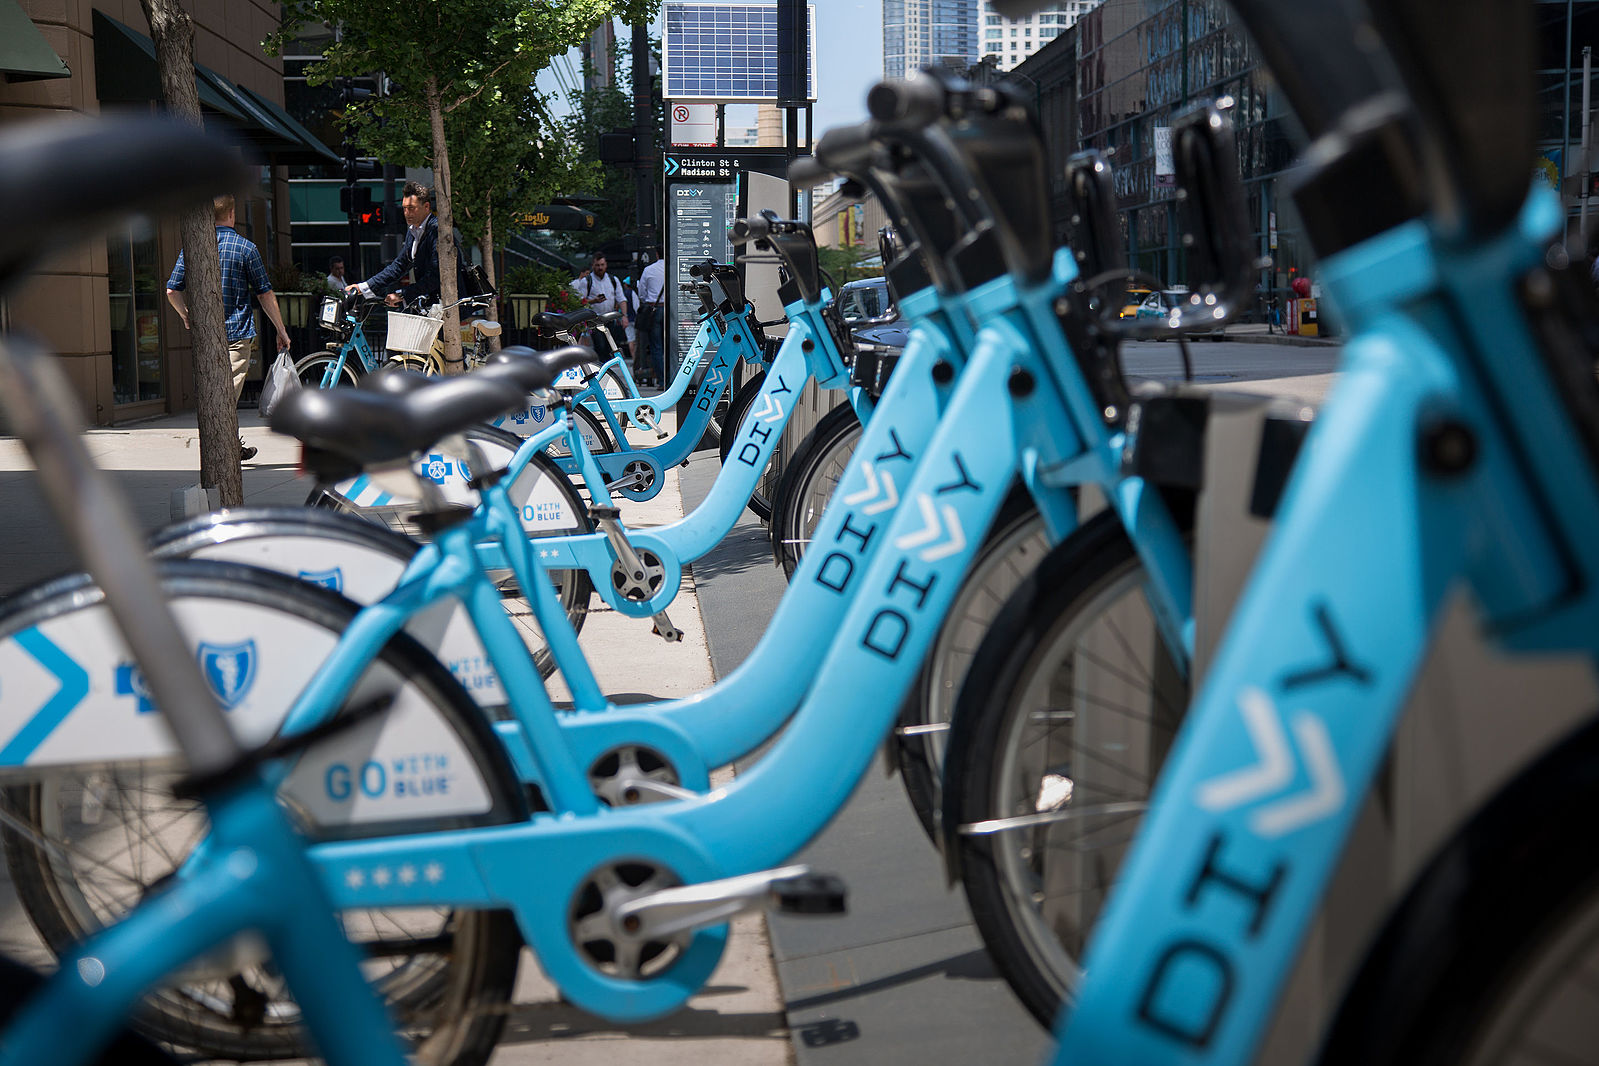

# **Introduction**

**Bike Share Data**

Over the past decade, bicycle-sharing systems have been growing in number and popularity in cities across the world. Bicycle-sharing systems allow users to rent bicycles on a very short-term basis for a price. This allows people to borrow a bike from point A and return it at point B, though they can also return it to the same location if they'd like to just go for a ride. Regardless, each bike can serve several users per day.

Thanks to the rise in information technologies, it is easy for a user of the system to access a dock within the system to unlock or return bicycles. These technologies also provide a wealth of data that can be used to explore how these bike-sharing systems are used.

In this project, you will use data provided by Motivate, a bike share system provider for many major cities in the United States, to uncover bike share usage patterns. You will compare the system usage between three large cities: Chicago, New York City, and Washington, DC.

# **Goal:**

# **Statistics Computed**

You will learn about bike share use in Chicago, New York City, and Washington by computing a variety of descriptive statistics. In this project, you'll write code to provide the following information:

# Popular times of travel (i.e., occurs most often in the start time)

* most common month
* most common day of week
* most common hour of day

# Popular stations and trip

* most common start station
* most common end station
* most common trip from start to end (i.e., most frequent combination of start station and end station)

# Trip duration

* total travel time
* average travel time

# User info

* counts of each user type
* counts of each gender (only available for NYC and Chicago)
* earliest, most recent, most common year of birth (only available for NYC and Chicago)

# **Data Description**

**The Datasets**

Randomly selected data for the first six months of 2017 are provided for all three cities. All three of the data files contain the same core six (6) columns:

*  Start Time (e.g., 2017-01-01 00:07:57)
*  End Time (e.g., 2017-01-01 00:20:53)
* Trip Duration (in seconds - e.g., 776)
*Start Station (e.g., Broadway & Barry Ave)
*End Station (e.g., Sedgwick St & North Ave)
*User Type (Subscriber or Customer)

The Chicago and New York City files also have the following two columns:

*   Gender
*   Birth Year

**The Files**

* chicago.csv
* new_york_city.csv
* washington.csv

In [1]:
import time
import pandas as pd
import numpy as np


CITY_DATA = { 'chicago': '/content/drive/MyDrive/chicago.csv',
              'new york city': '/content/drive/MyDrive/new_york_city.csv',
              'washington': '/content/drive/MyDrive/washington.csv' }

def check_input(input_str,input_type):
    """
    check the validity of user input.
    input_str: is the input of the user
    input_type: is the type of input: 1 = city, 2 = month, 3 = day
    """
    
    while True:
        
        input_read=input(input_str)
        input_read=input_read.lower()
        try:
            if input_read in ['chicago','new york city','washington'] and input_type == 1:
                break
            elif input_read in ['january', 'february', 'march', 'april', 'may', 'june','all'] and input_type == 2:
                break
            elif input_read in ['sunday','monday','tuesday','wednesday','thursday','friday','saturday','all'] and input_type == 3:
                break
            else:
                if input_type == 1:
                    print("Invalid Input, your input should be: chicago new york city or washington")
                if input_type == 2:
                    print("Invalid Input, your input should be: january, february, march, april, may, june or all")
                if input_type == 3:
                    print("Invalid Input, your input should be: sunday, ... friday, saturday or all")
        except ValueError:
            print("Invalid Input")
    return input_read

def get_filters():
    """
    Asks user to specify a city, month, and day to analyze.
    Returns:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    """
    print('Hello! Let\'s explore some US bikeshare data!')
    # get user input for city (chicago, new york city, washington). HINT: Use a while loop to handle invalid inputs
    city = check_input("Would you like to see the data for chicago, new york city or washington?",1)
  
    # get user input for month (all, january, february, ... , june)
    month = check_input("Which Month (all, january, ... june)?", 2)
    
    # get user input for day of week (all, monday, tuesday, ... sunday)
    day = check_input("Which day? (all, monday, tuesday, ... sunday)", 3)
    print('-'*40)
    return city, month, day

def load_data(city, month, day):
    """
    Loads data for the specified city and filters by month and day if applicable.
    Args:
        (str) city - name of the city to analyze
        (str) month - name of the month to filter by, or "all" to apply no month filter
        (str) day - name of the day of week to filter by, or "all" to apply no day filter
    Returns:
        df - Pandas DataFrame containing city data filtered by month and day
    """
    # load data file into a dataframe
    df = pd.read_csv(CITY_DATA[city])

    # convert the Start Time column to datetime
    df['Start Time'] = pd.to_datetime(df['Start Time'])

    # extract month, day of week, hour from Start Time to create new columns
    df['month'] = df['Start Time'].dt.month
    df['day_of_week'] = df['Start Time'].dt.day_name()
    df['hour'] = df['Start Time'].dt.hour

    # filter by month if applicable
    if month != 'all':
        # use the index of the months list to get the corresponding int
        months = ['january', 'february', 'march', 'april', 'may', 'june']
        month = months.index(month) + 1

        # filter by month to create the new dataframe
        df = df[df['month'] == month]

    # filter by day of week if applicable
    if day != 'all':
        # filter by day of week to create the new dataframe
        df = df[df['day_of_week'] == day.title()]

    return df


def time_stats(df):
    """Displays statistics on the most frequent times of travel."""

    print('\nCalculating The Most Frequent Times of Travel...\n')
    start_time = time.time()

    # display the most common month
    popular_month = df['month'].mode()[0]

    print('Most Popular Month:', popular_month)

    # display the most common day of week
    popular_day_of_week = df['day_of_week'].mode()[0]

    print('Most Day Of Week:', popular_day_of_week)

    # display the most common start hour
    popular_common_start_hour = df['hour'].mode()[0]

    print('Most Common Start Hour:', popular_common_start_hour)

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def station_stats(df):
    """Displays statistics on the most popular stations and trip."""

    print('\nCalculating The Most Popular Stations and Trip...\n')
    start_time = time.time()

    # display most commonly used start station
    popular_start_station = df['Start Station'].mode()[0]

    print('Most Start Station:', popular_start_station)

    # display most commonly used end station
    popular_end_station = df['End Station'].mode()[0]

    print('Most End Station:', popular_end_station)

    # display most frequent combination of start station and end station trip
    group_field=df.groupby(['Start Station','End Station'])
    popular_combination_station = group_field.size().sort_values(ascending=False).head(1)
    print('Most frequent combination of Start Station and End Station trip:\n', popular_combination_station)

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def trip_duration_stats(df):
    """Displays statistics on the total and average trip duration."""

    print('\nCalculating Trip Duration...\n')
    start_time = time.time()

    # display total travel time
    total_travel_time = df['Trip Duration'].sum()

    print('Total Travel Time:', total_travel_time)

    # display mean travel time
    mean_travel_time = df['Trip Duration'].mean()

    print('Mean Travel Time:', mean_travel_time)

    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def user_stats(df,city):
    """Displays statistics on bikeshare users."""

    print('\nCalculating User Stats...\n')
    start_time = time.time()

    # Display counts of user types
    print('User Type Stats:')
    print(df['User Type'].value_counts())
    if city != 'washington':
        # Display counts of gender
        print('Gender Stats:')
        print(df['Gender'].value_counts())
        # Display earliest, most recent, and most common year of birth
        print('Birth Year Stats:')
        most_common_year = df['Birth Year'].mode()[0]
        print('Most Common Year:',most_common_year)
        most_recent_year = df['Birth Year'].max()
        print('Most Recent Year:',most_recent_year)
        earliest_year = df['Birth Year'].min()
        print('Earliest Year:',earliest_year)
    print("\nThis took %s seconds." % (time.time() - start_time))
    print('-'*40)


def main():
    while True:
        city, month, day = get_filters()
        df = load_data(city, month, day)

        time_stats(df)
        station_stats(df)
        trip_duration_stats(df)
        user_stats(df,city)

        restart = input('\nWould you like to restart? Enter yes or no.\n')
        if restart.lower() != 'yes':
            break


if __name__ == "__main__":
	main()

Hello! Let's explore some US bikeshare data!
Would you like to see the data for chicago, new york city or washington?chicago
Which Month (all, january, ... june)?all
Which day? (all, monday, tuesday, ... sunday)all
----------------------------------------

Calculating The Most Frequent Times of Travel...

Most Popular Month: 6
Most Day Of Week: Tuesday
Most Common Start Hour: 17

This took 0.035610198974609375 seconds.
----------------------------------------

Calculating The Most Popular Stations and Trip...

Most Start Station: Streeter Dr & Grand Ave
Most End Station: Streeter Dr & Grand Ave
Most frequent combination of Start Station and End Station trip:
 Start Station              End Station            
Lake Shore Dr & Monroe St  Streeter Dr & Grand Ave    854
dtype: int64

This took 0.12737464904785156 seconds.
----------------------------------------

Calculating Trip Duration...

Total Travel Time: 280871787
Mean Travel Time: 936.23929

This took 0.004384040832519531 seconds.
